# The 2020-21 NBA MVP race is an extremely tight race. We will attempt to predict the 2020-21 NBA MVP.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

In [2]:
df_19_20 = pd.read_csv('2019-20NBAStats.csv')
df_18_19 = pd.read_csv('2018-19NBAStats.csv')
df_17_18 = pd.read_csv('2017-18NBAStats.csv')

In [3]:
# MVP James Harden
df_17_18['Player'] = df_17_18['Player'].str.split('\\').str[0]
# MVP Giannis Antetokounmpo
df_18_19['Player'] = df_18_19['Player'].str.split('\\').str[0]
# MVP Giannis Antetokounmpo
df_19_20['Player'] = df_19_20['Player'].str.split('\\').str[0]

#df['Allstar'] = df.apply(lambda x: x['Name'] in all_stars, axis = 1)

df_17_18['MVP'] = df_17_18.apply(lambda x: x['Player'] == 'James Harden',axis = 1).astype(int)
df_18_19['MVP'] = df_18_19.apply(lambda x: x['Player'] == 'Giannis Antetokounmpo',axis = 1).astype(int)
df_19_20['MVP'] = df_19_20.apply(lambda x: x['Player'] == 'Giannis Antetokounmpo',axis = 1).astype(int)


In [4]:
df_17_18['Tm'].unique()

team_win_pct_19_20 = {'MIL' : .767, 'TOR': .736, 'BOS': .667, 'IND': .616, 'MIA': .603, 'PHI': .589, 'BRK': .486, 'ORL': .452, 'CHO': .354, 'WAS': .347, 'CHI': .338,'NYK': .318, 'DET': .303, 'ATL': .299, 'CLE': .292, 'LAL': .732, 'LAC': .681, 'DEN': .630, 'HOU': .611, 'OKC': .611, 'UTA': .611, 'DAL': .573, 'POR': .473, 'MEM': .466, 'PHO': .466, 'SAS': .451, 'SAC': .431, 'NOP': .417, 'MIN': .297, 'GSW': .231}
team_win_pct_18_19 = {'MIL' : .732, 'TOR': .707, 'BOS': .598, 'IND': .585, 'MIA': .476, 'PHI': .622, 'BRK': .512, 'ORL': .512, 'CHO': .476, 'WAS': .390, 'CHI': .268,'NYK': .207, 'DET': .500, 'ATL': .354, 'CLE': .232, 'LAL': .451, 'LAC': .585, 'DEN': .659, 'HOU': .646, 'OKC': .598, 'UTA': .610, 'DAL': .402, 'POR': .646, 'MEM': .402, 'PHO': .232, 'SAS': .585, 'SAC': .476, 'NOP': .402, 'MIN': .439, 'GSW': .695}
team_win_pct_17_18 = {'MIL' : .537, 'TOR': .720, 'BOS': .671, 'IND': .585, 'MIA': .537, 'PHI': .634, 'BRK': .341, 'ORL': .305, 'CHO': .439, 'WAS': .524, 'CHI': .329,'NYK': .354, 'DET': .476, 'ATL': .293, 'CLE': .610, 'LAL': .427, 'LAC': .512, 'DEN': .561, 'HOU': .793, 'OKC': .585, 'UTA': .585, 'DAL': .293, 'POR': .598, 'MEM': .268, 'PHO': .256, 'SAS': .573, 'SAC': .329, 'NOP': .585, 'MIN': .573, 'GSW': .707}



df_17_18['WIN%'] = df_17_18['Tm'].map(team_win_pct_17_18)
df_18_19['WIN%'] = df_18_19['Tm'].map(team_win_pct_18_19)
df_19_20['WIN%'] = df_19_20['Tm'].map(team_win_pct_19_20)


In [5]:
df_17_18['Player'] = df_17_18['Player'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_18_19['Player'] = df_18_19['Player'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')
df_19_20['Player'] = df_19_20['Player'].str.normalize('NFKD').str.encode('ascii', errors = 'ignore').str.decode('utf-8')

In [6]:
# Create a new data frame df that includes data from 2017-2020
frames = [df_17_18, df_18_19, df_19_20]

df = pd.concat(frames)

# Drop Missing or NA rows
df.dropna(inplace = True)


# Creating Field Goal Attempts, Free Throws Made, and Free Throw Rate Statistics. We will use FTR as a feature!

df['FTM'] = (df['FT%']*df['FTA'])
df['FTR'] = df['FTM']/df['FGA']

In [29]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Initial Guess at most important features
X = df[['GS','PTS','AST','FTR','MP','STL','BLK','WIN%']]
# Target Column is all star since that is what we want to predict
y = df['MVP']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42,test_size = 0.3)

In [8]:
# Random Forest Algorithm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics


clf=RandomForestClassifier(n_estimators=1000,random_state = 40)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)


print("Accuracy:", metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9958071278825996


In [10]:
# Plot Feature Function to plot the most important features!
def plot_feature_importance(importance, names, model_type,topfeatures):
    
    # Arrays from feature importance and feature naes
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    # Create a DF using a dictionary

    data = {'feature_names': feature_names, 'feature_importance': feature_importance}
    FI_df = pd.DataFrame(data)

    # Sort DF in terms of feature importance
    FI_df.sort_values(by = ['feature_importance'], ascending = False, inplace = True)
    
    # Font 
    font = {'fontname': 'Georgia'}
    
    
    
    #Plot Feature Importance Bar Chart
    plt.figure(figsize = (5,5))
    sns.barplot(x = FI_df['feature_importance'][:topfeatures], y = FI_df['feature_names'][:topfeatures])

    
    plt.title(model_type + ' Feature Importance',**font,fontsize = 20,fontweight="bold")
    plt.xlabel('Feature Importance',**font,fontsize = 15,fontweight="bold")
    plt.ylabel('Feature Names',**font,fontsize = 15,fontweight="bold")
    plt.xticks(**font)
    plt.yticks(**font)

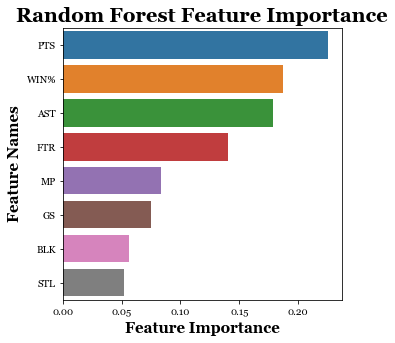

In [11]:
plot_feature_importance(clf.feature_importances_, X.columns, 'Random Forest',10)

In [13]:
df[df['MVP'] == 1]

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,AST,STL,BLK,TOV,PF,PTS,MVP,WIN%,FTM,FTR
232,194,James Harden,SG,28,HOU,72,72,35.4,9.0,20.1,...,8.8,1.8,0.7,4.4,2.3,30.4,1,0.793,8.6658,0.431134
19,18,Giannis Antetokounmpo,PF,24,MIL,72,72,32.8,10.0,17.3,...,5.9,1.3,1.5,3.7,3.2,27.7,1,0.732,6.9255,0.400318
12,13,Giannis Antetokounmpo,PF,25,MIL,63,63,30.4,10.9,19.7,...,5.6,1.0,1.0,3.7,3.1,29.5,1,0.767,6.3300,0.321320


Text(29.5, 0.767, 'Antetokounmpo 19-20 MVP')

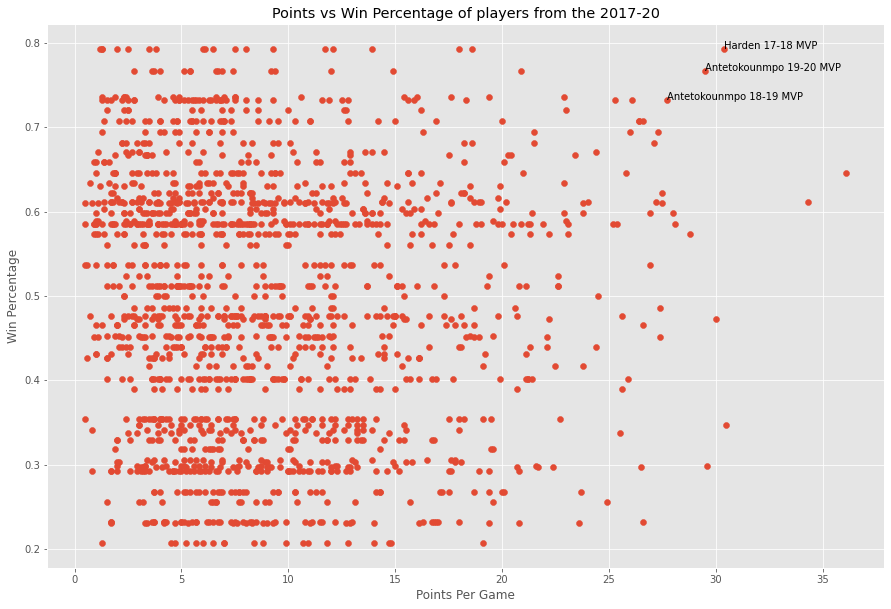

In [42]:
# Scatter plot of 2017-20 NBA players 

plt.style.use('ggplot')
plt.figure(figsize = (15,10))
plt.scatter(x = df['PTS'], y = df['WIN%'])
plt.title('Points vs Win Percentage of players from the 2017-20')
plt.xlabel('Points Per Game')
plt.ylabel('Win Percentage')
plt.text(30.4,0.793,'Harden 17-18 MVP')
plt.text(27.7,0.732,'Antetokounmpo 18-19 MVP')
plt.text(29.5,0.767,'Antetokounmpo 19-20 MVP')

In [15]:
# Load in the Data
df_20_21 = pd.read_csv('stats.csv',header = 1).drop(['RANK'],axis = 1)
df_20_21.columns = ['Name','Team','Position','Age','GP','MPG','MIN%','USG%','TO%','FTA','FT%','2PA','2P%','3PA','3P%','eFG%','TS%','PPG','RPG','TRB%','APG','AST%','SPG','BPG','TOPG','VI','ORTG','DRTG']

In [43]:
# Create a win percentage column
team_win_pct_20_21 = {'Mil' : .619, 'Tor': .413, 'Bos': .531, 'Ind': .468, 'Mia': .524, 'Phi': .667, 'Bro': .672, 'Orl': .302, 'Cha': .484, 'Was': .460, 'Chi': .413,'Nyk': .556, 'Det': .302, 'Atl': .531, 'Cle': .333, 'Lal': .571, 'Lac': .672, 'Den': .667, 'Hou': .254, 'Okc': .333, 'Uta': .714, 'Dal': .565, 'Por': .556, 'Mem': .516, 'Pho': .714, 'San': .500, 'Sac': .413, 'Nor': .444, 'Min': .313, 'Gol': .492}
df_20_21['WIN%'] = df_20_21['Team'].map(team_win_pct_20_21)


(array([0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 <a list of 8 Text major ticklabel objects>)

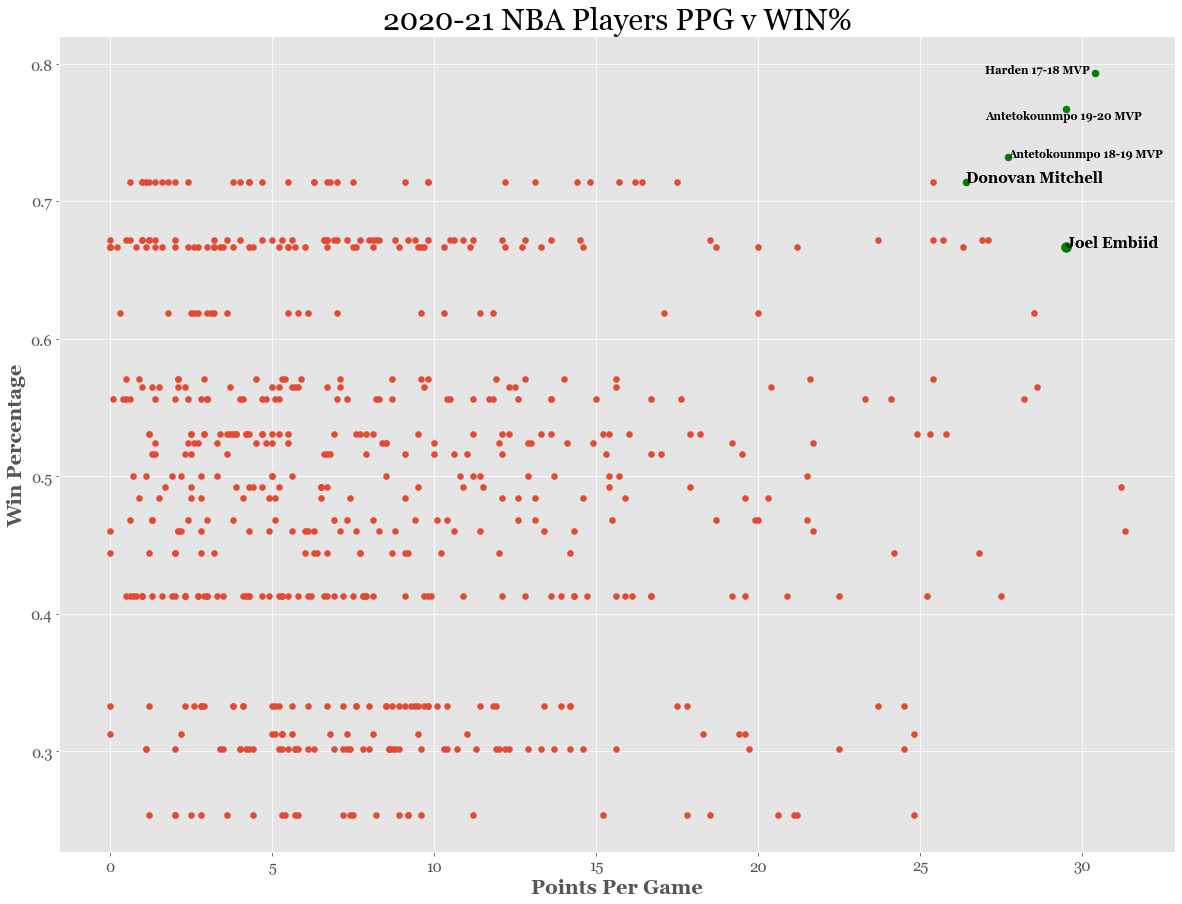

In [44]:
# Plot of 2020-21 NBA Players with previous MVPs as points of reference.

font = {'fontname': 'Georgia'}

plt.figure(figsize = (20,15))
plt.scatter(x = df_20_21['PPG'], y = df_20_21['WIN%'])
plt.scatter(x = 30.4, y = 0.793,s = 50, color = 'green')
plt.scatter(x = 27.7, y = 0.732, s= 50,color = 'green')
plt.scatter(x = 29.5, y =0.767,s = 50, color = 'green')
plt.scatter(x = 29.5, y = 0.667, s = 100, color = 'green')
plt.scatter(x = 26.4, y= 0.714, s = 50, color = 'green')
plt.title('2020-21 NBA Players PPG v WIN%',fontsize = 30,**font)
plt.xlabel('Points Per Game',fontsize = 20,**font,fontweight = 'bold')
plt.ylabel('Win Percentage',fontsize = 20,**font,fontweight = 'bold')
plt.text(27,0.793,'Harden 17-18 MVP', fontsize = 11,fontweight = 'bold',**font)
plt.text(27.7,0.732,'Antetokounmpo 18-19 MVP',fontsize = 11,fontweight = 'bold',**font)
plt.text(27,0.76,'Antetokounmpo 19-20 MVP', fontsize = 11, fontweight = 'bold',**font)
plt.text(29.5, 0.667,'Joel Embiid',fontsize = 15,fontweight = 'bold',**font)
plt.text(26.4, 0.714,'Donovan Mitchell',fontsize = 15,fontweight = 'bold',**font)
plt.xticks(**font,fontsize = 15)
plt.yticks(**font,fontsize = 15)

In [30]:
top_5 = df_20_21[(df_20_21['PPG'] > 26) & (df_20_21['WIN%'] > 0.60)]

In [32]:
top_5[['PPG','Name','WIN%']]

,PPG,Name,WIN%
2,29.5,Joel Embiid,0.667
4,28.5,Giannis Antetokounmpo,0.619
7,27.1,Kevin Durant,0.672
8,26.9,Kyrie Irving,0.672
10,26.4,Donovan Mitchell,0.714
11,26.3,Nikola Jokic,0.667


# As the 2021 NBA MVP race is coming down to the wire. We have a plot of points per game vs win percentage for all 20-21 NBA players. We can also see the last 3 NBA MVPs. Based on this plot if Joel Embiid can maintain his PPG and Win Percetage, he is our pick for the 20-21 NBA MVP! Donovan Mitchell is also having a MVP caliber season and should be metioned in the NBA MVP discussion.